<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:25%"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 250px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Assignment 1 - Food Classification Model (Individual)</h2><h3>AY2020/21 Semester</h3></th>
    </tr>
</table>

In [0]:
# Import the Required Packages
from tensorflow import keras
print('keras: ', keras.__version__)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

keras:  2.3.0-tf


## Step 1: Data Loading

### Local Machine JupyterNotebook

In [0]:
import tensorflow.keras
import os, shutil

 #Set the base directory as the current directory
base_dir = os.getcwd()

#Set the base directory as where you save the downloaded food_images
image_dir = 'C:/DL_Notebk/food_images' 

# Directories for your training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Assign the 10 types of food from your .txt file to a list variable 'food_list'
   
label_file = os.path.join(base_dir, '13.txt') 
# Refer to the report Appendix
# Please enter the name of .txt file which contains a list of food assigned to you
# Make sure you save the .txt file in your base_dir

with open(label_file, 'r') as f:
    x = f.readlines()
    
food_list =[]
for item in x:
    if item == '\n':
        continue        
    else:
        food_list.append(item.strip('\n'))
        
#copy the first 750 images to train folder
for item in food_list:
    train_food_dir = os.path.join(train_dir, item)
    os.mkdir(train_food_dir)
    img_list = os.listdir(os.path.join(image_dir, item))[:750]
    for fname in img_list:
        src = os.path.join(image_dir, item, fname)
        dst = os.path.join(train_food_dir, fname)
        shutil.copyfile(src, dst)
        
#copy the following 200 images [750:950] to validation folder
for item in food_list:
    validation_food_dir = os.path.join(validation_dir, item)
    os.mkdir(validation_food_dir)
    img_list = os.listdir(os.path.join(image_dir, item))[750:950]
    for fname in img_list:
        src = os.path.join(image_dir, item, fname)
        dst = os.path.join(validation_food_dir, fname)
        shutil.copyfile(src, dst)
        
#copy the remaining 50 images [950:1000] to test folder
for item in food_list:
    test_food_dir = os.path.join(test_dir, item)
    os.mkdir(test_food_dir)
    img_list = os.listdir(os.path.join(image_dir, item))[950:1000]
    for fname in img_list:
        src = os.path.join(image_dir, item, fname)
        dst = os.path.join(test_food_dir, fname)
        shutil.copyfile(src, dst)

In [0]:
#run if directories already created

import tensorflow.keras
import os, shutil

#Set the base directory as the current directory
base_dir = os.getcwd()

#Set the base directory as where you save the downloaded food_images
image_dir = 'C:/DL_Notebk/food_images' 
# Directories for your training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

### Google Colab + GitHub

In [0]:
#run for GitHub Colab
!git clone "https://github.com/BenjLiew/DL_Assg1.git"


Cloning into 'DL_Assg1'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10050 (delta 5), reused 7 (delta 2), pack-reused 10039
Receiving objects: 100% (10050/10050), 474.95 MiB | 12.99 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Checking out files: 100% (10002/10002), done.


In [0]:
#GitHub Colab directory
# Directories for your training, validation and test splits
train_dir = '/content/DL_Assg1/train'
validation_dir = '/content/DL_Assg1/validation'
test_dir = '/content/DL_Assg1/test'

In [0]:
#Google drive model upload/save storage
from google.colab import drive
drive.mount('/content/drive')

model_path='/content/drive/My Drive/Colab Notebooks/models/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Step 2:  Develop the Image Classification Models

### Model #1 (BaseModel / Own-Model)

### Model #2 (Pre-train - ResNet50)

### Model #3 (Pre-train - VGG19)

In [0]:
# Build the Model
from tensorflow.keras.applications import VGG19
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#VGG19 convbase
conv_base2 = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#unfreezing layers 
conv_base2.trainable = True

model2 = models.Sequential()
model2.add(conv_base2) #VGG19 pre-train
model2.add(layers.Flatten())
model2.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.002), activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.002), activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(10, activation='softmax'))


conv_base2.summary()
model2.summary()

80142336/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [0]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=2e-5),
              metrics=['acc'])

history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=75,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/75
750/750 [==============================] - 122s 163ms/step - loss: 3.5124 - acc: 0.2549 - val_loss: 2.8035 - val_acc: 0.5140
Epoch 2/75
750/750 [==============================] - 125s 166ms/step - loss: 2.6940 - acc: 0.5196 - val_loss: 2.1584 - val_acc: 0.6915
Epoch 3/75
750/750 [==============================] - 125s 167ms/step - loss: 2.2757 - acc: 0.6520 - val_loss: 1.8822 - val_acc: 0.7615
Epoch 4/75
750/750 [==============================] - 126s 168ms/step - loss: 2.0293 - acc: 0.7188 - val_loss: 1.6853 - val_acc: 0.8055
Epoch 5/75
750/750 [==============================] - 125s 167ms/step - loss: 1.8847 - acc: 0.7505 - val_loss: 1.7852 - val_acc: 0.7705
Epoch 6/75
750/750 [==============================] - 125s 167ms/step - loss: 1.7442 - acc: 0.7804 - val_loss: 1.5925 - val_acc: 0.8035
Epoch 7/75
750/750 [==

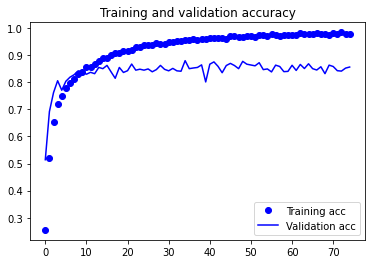

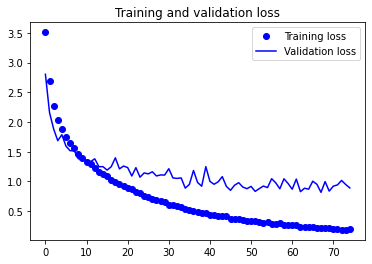

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.8659999966621399


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model2.save(model_path+'food_model_(VGG19_unfrozen)_Adam_regularizer_v2.h5')
model2.save('food_model_(VGG19_unfrozen)_Adam_regularizer_v2_backup.h5')

### Model #4 (Pre-train - MobileNet)

In [0]:
# Build the Model
from tensorflow.keras.applications import MobileNet
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline

img_size = 150

#MobileNet convbase
conv_base2 = MobileNet(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))

#unfreezing layers 
conv_base2.trainable = True

model2 = models.Sequential()
model2.add(conv_base2) #MobileNet pre-train
model2.add(layers.Flatten())
model2.add(layers.Dense(256, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(10, activation='softmax'))


conv_base2.summary()
model2.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 151, 151, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 75, 75, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 75, 75, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 75, 75, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 75, 75, 32) 

In [0]:
# Train the Model

#data augmentation for train data
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(img_size, img_size),
        batch_size=10,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_size, img_size),
        batch_size=10,
        class_mode='categorical')




#compiling 
model2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.0001),
              metrics=['acc'])

history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
750/750 [==============================] - 87s 116ms/step - loss: 2.6220 - acc: 0.3268 - val_loss: 1.2736 - val_acc: 0.6905
Epoch 2/30
750/750 [==============================] - 86s 115ms/step - loss: 1.7136 - acc: 0.5588 - val_loss: 1.0261 - val_acc: 0.7520
Epoch 3/30
750/750 [==============================] - 86s 114ms/step - loss: 1.4258 - acc: 0.6381 - val_loss: 0.9009 - val_acc: 0.7885
Epoch 4/30
750/750 [==============================] - 86s 115ms/step - loss: 1.2348 - acc: 0.6839 - val_loss: 0.8819 - val_acc: 0.7980
Epoch 5/30
750/750 [==============================] - 85s 114ms/step - loss: 1.1306 - acc: 0.7101 - val_loss: 0.7178 - val_acc: 0.8165
Epoch 6/30
750/750 [==============================] - 86s 114ms/step - loss: 1.0366 - acc: 0.7283 - val_loss: 0.6909 - val_acc: 0.8335
Epoch 7/30
750/750 [========

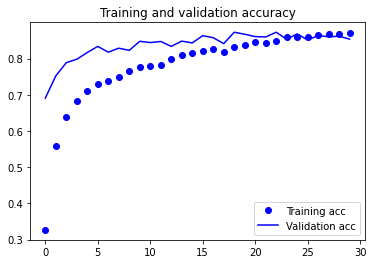

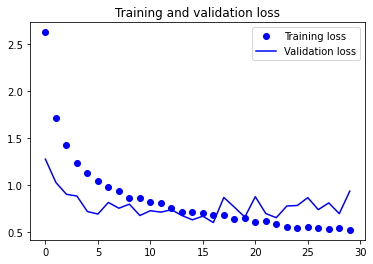

Found 500 images belonging to 10 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc: 0.8460000157356262


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model2.save(model_path+'food_model_(MobileNet_unfrozen_regularizer)v2.h5')
model2.save('food_model_(MobileNet_unfrozen_regularizer)v2backup.h5')

In [0]:
history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Epoch 1/30
750/750 [==============================] - 82s 109ms/step - loss: 0.5172 - acc: 0.8759 - val_loss: 0.7158 - val_acc: 0.8600
Epoch 2/30
750/750 [==============================] - 82s 109ms/step - loss: 0.5196 - acc: 0.8720 - val_loss: 0.7134 - val_acc: 0.8605
Epoch 3/30
750/750 [==============================] - 84s 111ms/step - loss: 0.5062 - acc: 0.8755 - val_loss: 0.8370 - val_acc: 0.8615
Epoch 4/30
750/750 [==============================] - 84s 112ms/step - loss: 0.5141 - acc: 0.8757 - val_loss: 1.0898 - val_acc: 0.8490
Epoch 5/30
750/750 [==============================] - 83s 111ms/step - loss: 0.4903 - acc: 0.8833 - val_loss: 0.8126 - val_acc: 0.8690
Epoch 6/30
750/750 [==============================] - 86s 115ms/step - loss: 0.4762 - acc: 0.8851 - val_loss: 0.7717 - val_acc: 0.8640
Epoch 7/30
750/750 [==============================] - 82s 109ms/step - loss: 0.4679 - acc: 0.8852 - val_loss: 0.8161 - val_acc: 0.8660
Epoch 8/30
750/750 [==============================] - 8

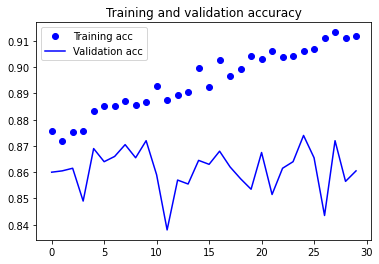

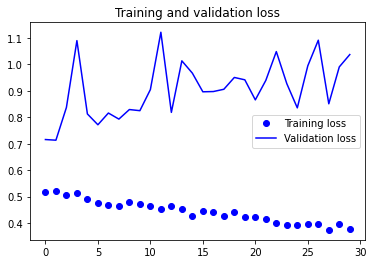

Found 500 images belonging to 10 classes.
test acc: 0.8579999804496765


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model2.save(model_path+'food_model_(MobileNet_unfrozen_regularizer)v2_1.h5')
model2.save('food_model_(MobileNet_unfrozen_regularizer)v2_1backup.h5')

In [0]:
#more epoch (total 100)
history2 = model2.fit_generator(
      train_generator,
      steps_per_epoch=750,
      epochs=40,
      validation_data=validation_generator,
      validation_steps=200,
      verbose=1)

Epoch 1/40
750/750 [==============================] - 84s 112ms/step - loss: 0.3755 - acc: 0.9159 - val_loss: 0.9065 - val_acc: 0.8635
Epoch 2/40
750/750 [==============================] - 84s 112ms/step - loss: 0.3571 - acc: 0.9152 - val_loss: 0.8136 - val_acc: 0.8745
Epoch 3/40
750/750 [==============================] - 84s 112ms/step - loss: 0.3789 - acc: 0.9127 - val_loss: 1.0888 - val_acc: 0.8675
Epoch 4/40
750/750 [==============================] - 84s 112ms/step - loss: 0.3795 - acc: 0.9131 - val_loss: 1.1148 - val_acc: 0.8610
Epoch 5/40
750/750 [==============================] - 84s 112ms/step - loss: 0.3721 - acc: 0.9141 - val_loss: 1.2027 - val_acc: 0.8590
Epoch 6/40
750/750 [==============================] - 84s 112ms/step - loss: 0.3739 - acc: 0.9129 - val_loss: 1.0861 - val_acc: 0.8565
Epoch 7/40
750/750 [==============================] - 82s 110ms/step - loss: 0.3645 - acc: 0.9155 - val_loss: 0.9163 - val_acc: 0.8735
Epoch 8/40
750/750 [==============================] - 8

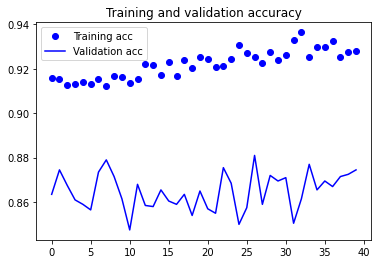

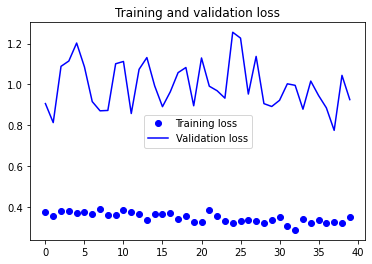

Found 500 images belonging to 10 classes.
test acc: 0.8759999871253967


In [0]:
# Plot the Training and Validation Accuracy & Loss Scores
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        batch_size=25,
        class_mode='categorical')
test_loss, test_acc = model2.evaluate_generator(test_generator, steps=20)
print('test acc:', test_acc)

In [0]:
# Save the Model to google drive
model2.save(model_path+'food_model_(MobileNet_unfrozen_regularizer)v2_2.h5')
model2.save('food_model_(MobileNet_unfrozen_regularizer)v2_2backup.h5')

## Step 3 – Evaluate the Developed Models using Testing Images

In [0]:
# Model #1
model.load_weights('food_model_1.h5')




In [0]:
# Model #2
model.load_weights('food_model_2.h5')




In [0]:
# Save the best model


model.save('food_model_best.h5')

## Step 4  – Use the best model to make prediction

In [0]:
# Load the model
model.load_weights('food_model_best.h5')

In [0]:
# Load the food list (in alphabetical order)
with open('??.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

In [0]:
# Define some related functions for image process and model prediction
from keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

In [0]:
# Make prediction for the image you downloaded from internet
import matplotlib.pyplot as plt
img = '??.jpeg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)